<a href="https://colab.research.google.com/github/dattali18/machine_learning_msc_course/blob/main/test_prep/ML_test_prep_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2626622572.py:52: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, Z_low, levels=[0.5], colors='blue', linewidths=2, label='Gamma=0.5 (Low)')
/tmp/ipython-input-2626622572.py:56: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, Z_high, levels=[0.5], colors='red', linewidths=2, linestyles='dashed', label='Gamma=50 (High)')


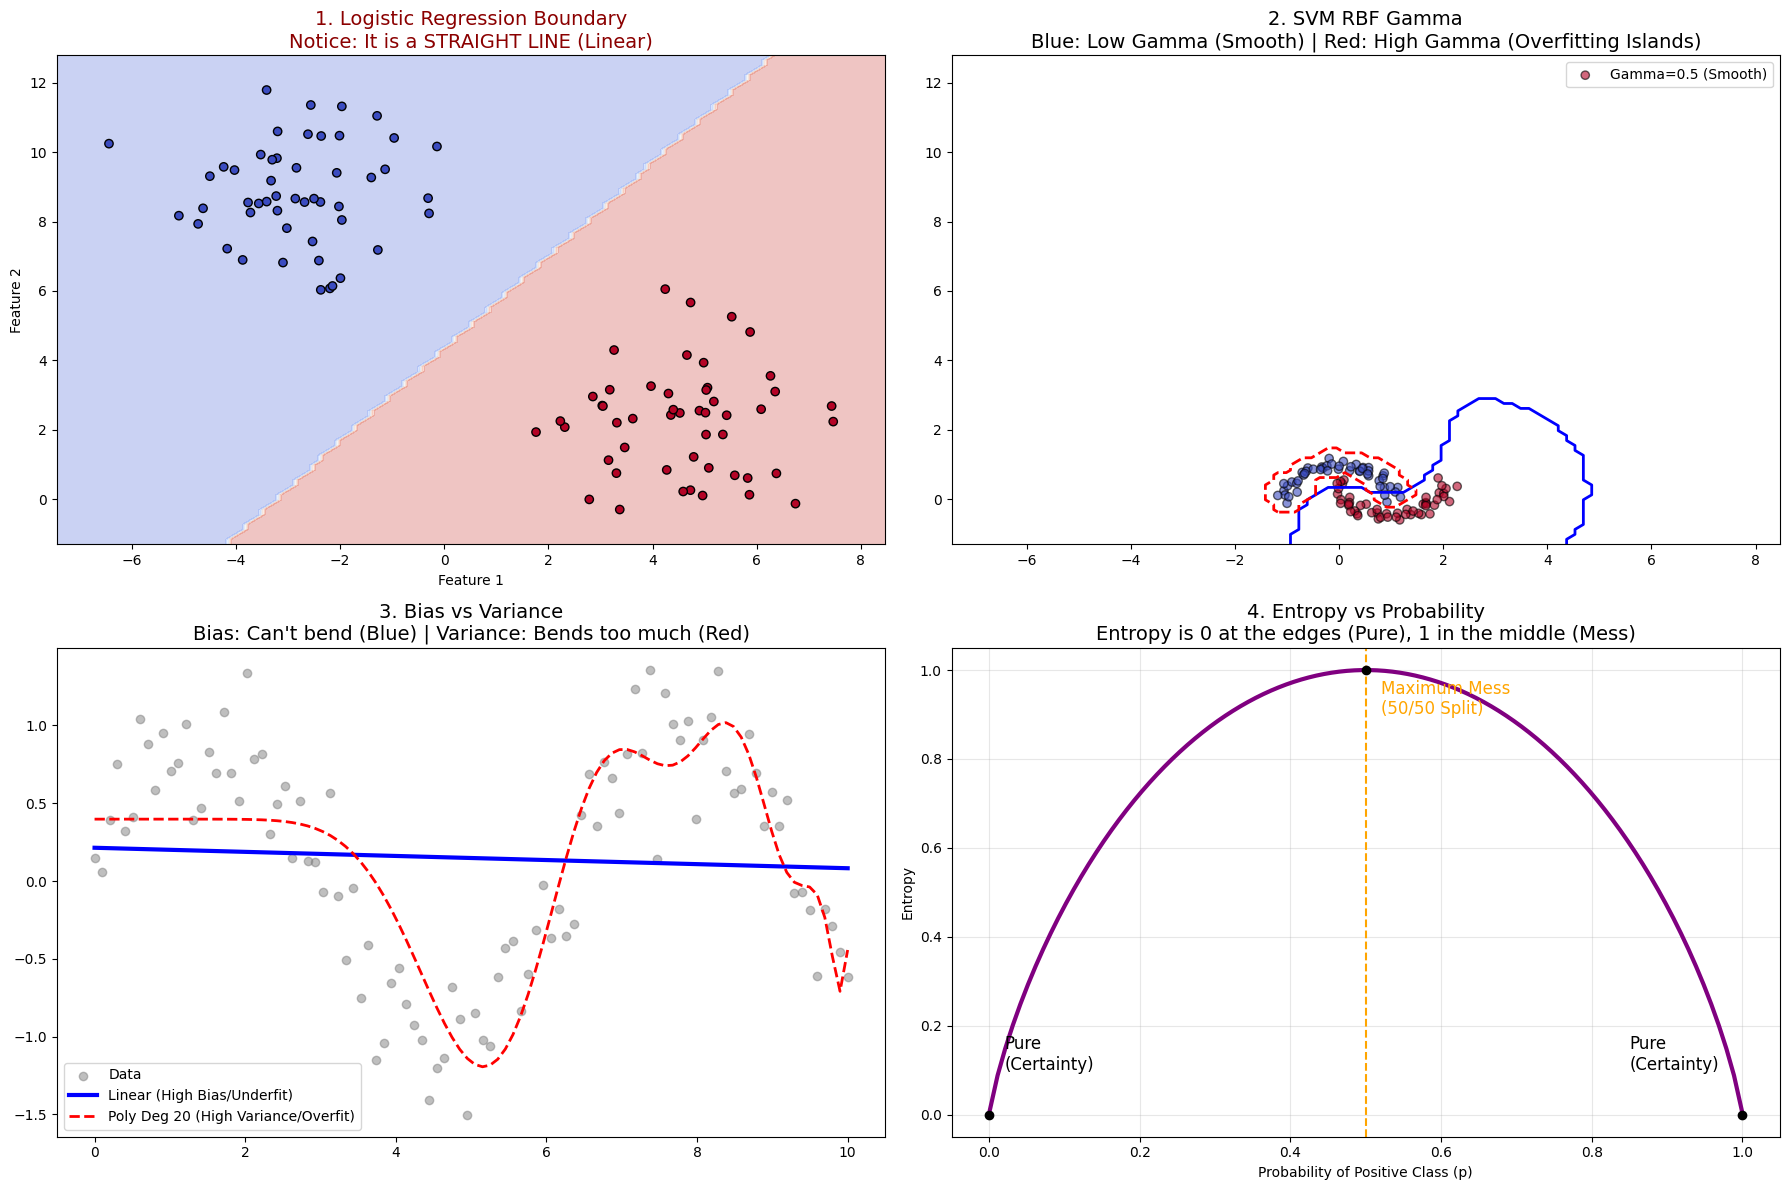

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_blobs, make_moons

# Set up the figure
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
plt.subplots_adjust(hspace=0.3)

# ==========================================
# 1. THE LINEARITY TRAP: Logistic Regression
# ==========================================
# Generates 2 blobs of data
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)
ax = axes[0, 0]

# Fit Logistic Regression
model = LogisticRegression()
model.fit(X, y)

# Create a meshgrid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
ax.set_title("1. Logistic Regression Boundary\nNotice: It is a STRAIGHT LINE (Linear)", fontsize=14, color='darkred')
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

# ==========================================
# 2. THE SVM KNOBS: Gamma Effect
# ==========================================
# Generate non-linear data (Moons)
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)
ax = axes[0, 1]

# Fit two SVMs: Low Gamma vs High Gamma
# Low Gamma = Far Reach (Smooth)
# High Gamma = Short Reach (Islands)
model_low = SVC(kernel='rbf', gamma=0.5).fit(X, y)   # Low Gamma
model_high = SVC(kernel='rbf', gamma=50).fit(X, y)   # High Gamma

# Plot Low Gamma Boundary (Blue)
Z_low = model_low.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax.contour(xx, yy, Z_low, levels=[0.5], colors='blue', linewidths=2, label='Gamma=0.5 (Low)')

# Plot High Gamma Boundary (Red)
Z_high = model_high.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax.contour(xx, yy, Z_high, levels=[0.5], colors='red', linewidths=2, linestyles='dashed', label='Gamma=50 (High)')

ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', alpha=0.6)
ax.set_title("2. SVM RBF Gamma\nBlue: Low Gamma (Smooth) | Red: High Gamma (Overfitting Islands)", fontsize=14)
ax.legend(["Gamma=0.5 (Smooth)", "Gamma=50 (Jagged)"])

# ==========================================
# 3. BIAS vs VARIANCE: Polynomial Fitting
# ==========================================
# Generate a simple curve (Sine wave) + Noise
np.random.seed(42)
X_line = np.linspace(0, 10, 100)
y_line = np.sin(X_line) + np.random.normal(0, 0.3, 100)
X_train = X_line[:, np.newaxis]
ax = axes[1, 0]

# High Bias: Linear Regression (Underfitting)
bias_model = LinearRegression().fit(X_train, y_line)
y_bias = bias_model.predict(X_train)

# High Variance: Degree 15 Polynomial (Overfitting)
var_model = make_pipeline(PolynomialFeatures(degree=20), LinearRegression())
var_model.fit(X_train, y_line)
y_var = var_model.predict(X_train)

# Plot
ax.scatter(X_line, y_line, color='gray', alpha=0.5, label='Data')
ax.plot(X_line, y_bias, color='blue', linewidth=3, label='Linear (High Bias/Underfit)')
ax.plot(X_line, y_var, color='red', linewidth=2, linestyle='--', label='Poly Deg 20 (High Variance/Overfit)')
ax.set_title("3. Bias vs Variance\nBias: Can't bend (Blue) | Variance: Bends too much (Red)", fontsize=14)
ax.legend()

# ==========================================
# 4. ENTROPY: The "Messiness" Curve
# ==========================================
ax = axes[1, 1]
probs = np.linspace(0.001, 0.999, 100)
# Entropy Formula: -p*log(p) - (1-p)*log(1-p)
entropy = -probs * np.log2(probs) - (1 - probs) * np.log2(1 - probs)

ax.plot(probs, entropy, color='purple', linewidth=3)
ax.axvline(x=0.5, color='orange', linestyle='--', label='Max Entropy (0.5)')
ax.scatter([0, 0.5, 1], [0, 1, 0], color='black', zorder=5)
ax.text(0.52, 0.9, 'Maximum Mess\n(50/50 Split)', fontsize=12, color='orange')
ax.text(0.02, 0.1, 'Pure\n(Certainty)', fontsize=12)
ax.text(0.85, 0.1, 'Pure\n(Certainty)', fontsize=12)

ax.set_title("4. Entropy vs Probability\nEntropy is 0 at the edges (Pure), 1 in the middle (Mess)", fontsize=14)
ax.set_xlabel("Probability of Positive Class (p)")
ax.set_ylabel("Entropy")
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()